# SETUP, DATA EXPLORATION, & LOADING DATA

> Installations

In [99]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\ProgramData\anaconda3\envs\CUSTOM\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\ProgramData\anaconda3\envs\CUSTOM\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\ProgramData\anaconda3\envs\CUSTOM\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\ProgramData\anaconda3\envs\CUSTOM\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_requirement_mar

In [100]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      2.0.0
anyio                        3.5.0
appdirs                      1.4.4
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Brotli                       1.0.9
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           2.0.4
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.1.1
cryptography                 41.0.3
cv                           1.0.0
cvlib                        0.2.7
cycler                       0.12.1
debugpy                  

> Dependencies

In [101]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imghdr

In [105]:
data_dir = 'tom_and_jerry'

In [106]:
os.listdir(os.path.join(data_dir))

['jerry', 'tom', 'tom_jerry_0', 'tom_jerry_1']

In [109]:
img1 = cv2.imread(os.path.join('tom_and_jerry','jerry','frame12.jpg'))

In [110]:
img1.shape

(720, 1280, 3)

- 720 pixels high
- 1280 pixels wide
- RGB kernels, colored img

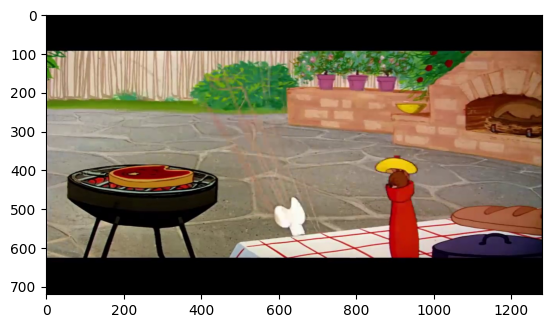

In [111]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [112]:
# function to remove dodgy images just in case if it doesn't follow valid image extension
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e:
#             print(f"Issue with image {image_path} due to {e}")
#             os.remove(image_path)

> Loading Data

In [113]:
import numpy as np

In [114]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



preprocesses images like so:
- directory,
- labels='inferred',
- label_mode='int',
- class_names=None,
- color_mode='rgb',
- batch_size=32,
- image_size=(256, 256),
- shuffle=True,
- seed=None,
- validation_split=None,
- subset=None,
- interpolation='bilinear',
- follow_links=False,
- crop_to_aspect_ratio=False

In [115]:
# builds an img dataset and preprocesses automatically, such as img resizing
data = tf.keras.utils.image_dataset_from_directory('tom_and_jerry')

Found 5478 files belonging to 4 classes.


In [116]:
data_iterator = data.as_numpy_iterator()

In [117]:
# gets another batch from the iterator
batch = data_iterator.next()

In [118]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [119]:
batch[1]

array([2, 1, 2, 1, 2, 2, 0, 1, 0, 3, 2, 0, 0, 0, 2, 1, 3, 1, 2, 1, 0, 0,
       3, 2, 0, 1, 1, 2, 0, 0, 3, 1])

- 0 = Jerry
- 1 = Tom
- 2 = Neither Tom or Jerry
- 3 = Both Tom & Jerry

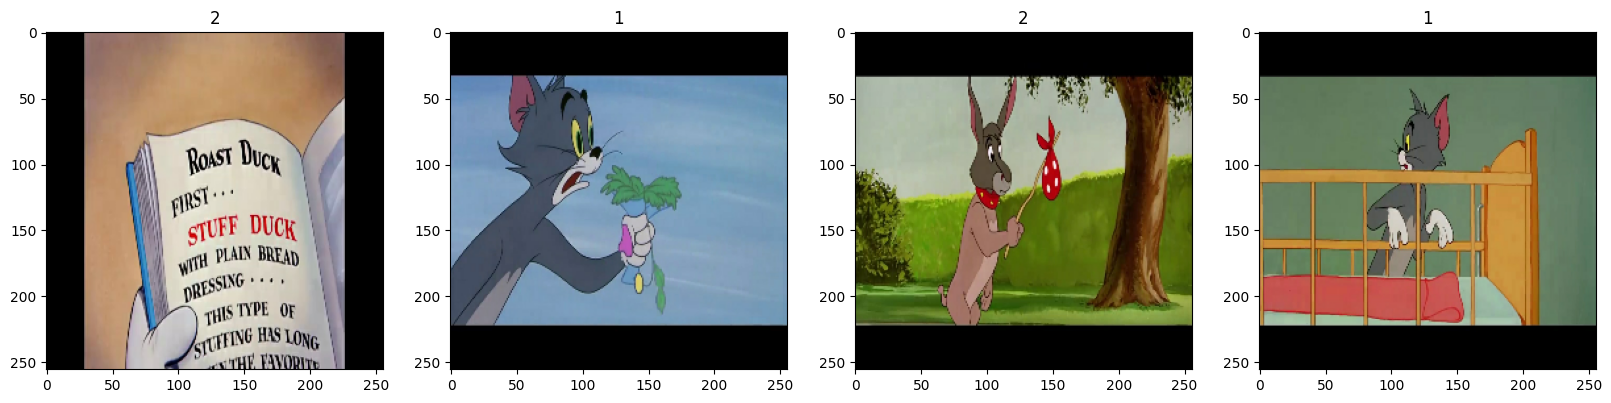

In [120]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [121]:
batch[0].min()

0.0

In [122]:
batch[0].max()

255.0

* when building deep learning models, the values must ideally be normalised. Ensuring that the values are scaled between 0 and 1.

# DATA PRE-PROCESSING

> Scaling Data

In [126]:
# Create the image dataset
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int'
)

Found 5478 files belonging to 4 classes.


In [127]:
# x represents imgs, y represents the target variable, /255 to scale all in the data pipeline
data = data.map(lambda x,y: (x/255, y))

In [128]:
scaled_iterator = data.as_numpy_iterator()

In [129]:
batch = scaled_iterator.next()

- data is now scaled, images are now between 0 and 1

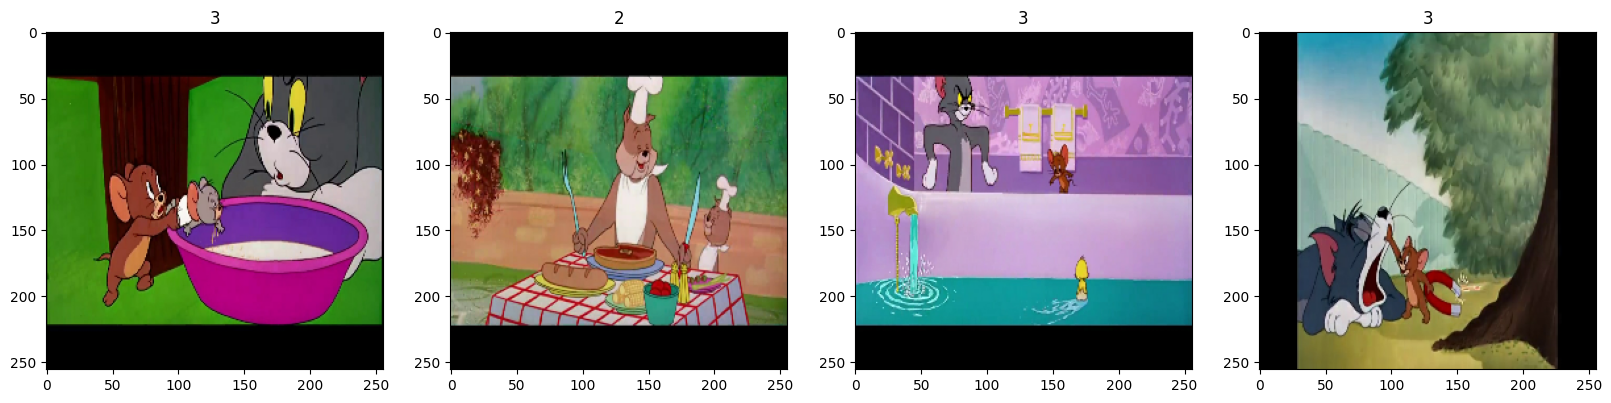

In [130]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

> Data Splitting

In [131]:
len(data)

172

- 172 batches, with each batch having 32 imgs

In [132]:
# deep learning model's training data 70% split
train_size = int(len(data)*0.7)
# validation data 20% used to evaluate whilst training
val_size = int(len(data)*0.2)
# test split 10%
test_size = int(len(data)*0.1)

In [133]:
train_size + val_size + test_size

171

'take' and 'skip' methods in the tf documentation 
- 'take' defines how much data we are going to take in the particular partition
- 'skip' lets you skip batches you've already allocated to the training partition

In [134]:
train = data.take(train_size) # how many batches we want to take for the training data
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# BUILDING THE DEEP LEARNING MODEL USING THE KERAS SEQUENTIAL API

> Deep neural network

In [136]:
MaxPooling2D??

Object `MaxPooling2D` not found.


- pool_size=(2, 2)

Using relu rather than others because x,y,z

Look into
Vanishing gradient problem
choice of activation function
no free lunch theorem

https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks
https://medium.com/@shrutijadon/survey-on-activation-functions-for-deep-learning-9689331ba092
https://research.google/pubs/searching-for-activation-functions/

In [169]:
from tensorflow.keras.regularizers import l2

In [170]:
# adding a convolutional layer and a max pooling layer
# adding this sequentially
    # [architectural decisions of hyperparams] 32 filters then doubled, 3x3 pixelsize, stride sideway by 3
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    # takes the maximum value after applying the activation relu, then returns the value back
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    # Flatten Layer - condenses the rows and the width, and the number of filters form the channel value
    tf.keras.layers.Flatten(),

    # Dense Layers - fully connected layers
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4, activation='softmax')
])

why use adam, why use that loss function, why use these metrics

In [171]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [172]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 128)      

> Training

In [173]:
logdir = 'logs'

In [174]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [175]:
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
120/120 [==============================] - 317s 3s/step - loss: 1.9476 - accuracy: 0.3346 - val_loss: 1.3752 - val_accuracy: 0.3134
Epoch 2/5
120/120 [==============================] - 316s 3s/step - loss: 1.3951 - accuracy: 0.3807 - val_loss: 1.3639 - val_accuracy: 0.4283
Epoch 3/5
120/120 [==============================] - 308s 3s/step - loss: 1.3552 - accuracy: 0.4612 - val_loss: 1.4592 - val_accuracy: 0.4108
Epoch 4/5
120/120 [==============================] - 301s 3s/step - loss: 1.3144 - accuracy: 0.5234 - val_loss: 1.2655 - val_accuracy: 0.6167
Epoch 5/5
120/120 [==============================] - 304s 3s/step - loss: 1.2751 - accuracy: 0.5888 - val_loss: 1.2160 - val_accuracy: 0.6351


In [176]:
hist.history

{'loss': [1.9476438760757446,
  1.3951208591461182,
  1.3551998138427734,
  1.3144258260726929,
  1.2751487493515015],
 'accuracy': [0.3346354067325592,
  0.38072916865348816,
  0.4611979126930237,
  0.5234375,
  0.5888020992279053],
 'val_loss': [1.3751742839813232,
  1.3638826608657837,
  1.4592431783676147,
  1.2655210494995117,
  1.2159662246704102],
 'val_accuracy': [0.3134191036224365,
  0.4283088147640228,
  0.4108455777168274,
  0.6167279481887817,
  0.6351103186607361]}

In [177]:
# save the best model 
model.save_weights("weights")

> Plotting Performance

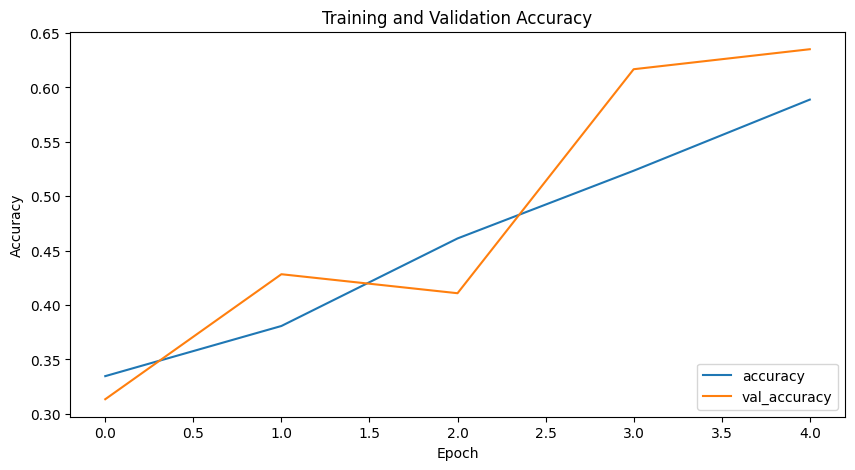

In [178]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

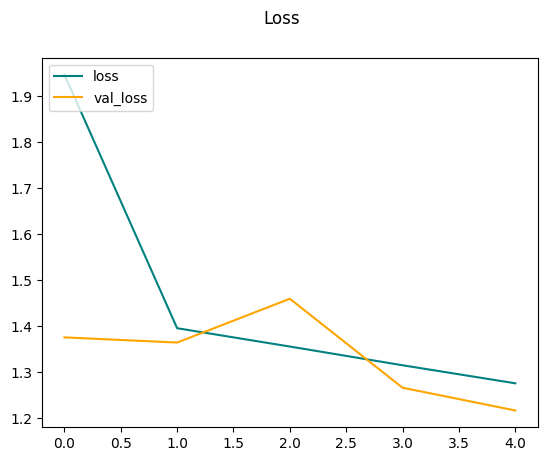

In [179]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss')
plt.legend(loc='upper left')
plt.show()

# EVALUATING PERFORMANCE

> Evaluate

In [180]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 0s 419ms/step


In [181]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(correct_labels, predicted_labels)

In [182]:
import pandas as pd
report = classification_report(correct_labels,predicted_labels,  output_dict=True)
df = pd.DataFrame(report).transpose()

In [183]:
from IPython.core.display import display, HTML
display(HTML(df.to_html()))

C:\Users\44751\AppData\Local\Temp\ipykernel_17392\3586852523.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,precision,recall,f1-score,support
0,0.802817,0.452381,0.578680,126.000000
1,0.619529,0.901961,0.734531,204.000000
2,0.575540,0.606061,0.590406,132.000000
3,0.702703,0.317073,0.436975,82.000000
accuracy,0.637868,0.637868,0.637868,0.637868
macro avg,0.675147,0.569369,0.585148,544.000000
weighted avg,0.663845,0.637868,0.618609,544.000000


In [184]:
confm = pd.DataFrame(conf_mat)
confm

,0,1,2,3
0,57,25,39,5
1,2,184,14,4
2,9,41,80,2
3,3,47,6,26


# Model with Transfer Learning

In [185]:
# Choose an advanced architecture
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Combine the base model with the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d_12[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [186]:
# Set up TensorBoard callback
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
hist = model.fit(train, epochs=8, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/8
120/120 [==============================] - 345s 3s/step - loss: 1.2409 - accuracy: 0.4630 - val_loss: 0.9745 - val_accuracy: 0.5827
Epoch 2/8
120/120 [==============================] - 410s 3s/step - loss: 1.0063 - accuracy: 0.5768 - val_loss: 0.9040 - val_accuracy: 0.6535
Epoch 3/8
120/120 [==============================] - 671s 6s/step - loss: 0.9124 - accuracy: 0.6201 - val_loss: 0.8087 - val_accuracy: 0.6829
Epoch 4/8
120/120 [==============================] - 684s 6s/step - loss: 0.8079 - accuracy: 0.6583 - val_loss: 0.7795 - val_accuracy: 0.7086
Epoch 5/8
120/120 [==============================] - 601s 5s/step - loss: 0.7739 - accuracy: 0.6898 - val_loss: 0.7316 - val_accuracy: 0.7206
Epoch 6/8
120/120 [==============================] - 623s 5s/step - loss: 0.7462 - accuracy: 0.7008 - val_loss: 0.7155 - val_accuracy: 0.7252
Epoch 7/8
120/120 [==============================] - 614s 5s/step - loss: 0.6890 - accuracy: 0.7336 - val_loss: 0.7228 - val_accuracy: 0.7188
Epoch 

In [187]:
base_model.save_weights("weights")

# Fine-Tune the Model

In [188]:
# Unfreeze some layers in the base model for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Continue training
hist_fine = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
120/120 [==============================] - 634s 5s/step - loss: 0.8766 - accuracy: 0.6266 - val_loss: 0.6381 - val_accuracy: 0.7555
Epoch 2/10
120/120 [==============================] - 607s 5s/step - loss: 0.6467 - accuracy: 0.7542 - val_loss: 0.6187 - val_accuracy: 0.7656
Epoch 3/10
120/120 [==============================] - 545s 5s/step - loss: 0.5261 - accuracy: 0.8099 - val_loss: 0.5768 - val_accuracy: 0.7767
Epoch 4/10
120/120 [==============================] - 593s 5s/step - loss: 0.4856 - accuracy: 0.8310 - val_loss: 0.5493 - val_accuracy: 0.7895
Epoch 5/10
120/120 [==============================] - 467s 4s/step - loss: 0.4162 - accuracy: 0.8599 - val_loss: 0.5223 - val_accuracy: 0.8006
Epoch 6/10
120/120 [==============================] - 368s 3s/step - loss: 0.3744 - accuracy: 0.8773 - val_loss: 0.4845 - val_accuracy: 0.8125
Epoch 7/10
120/120 [==============================] - 353s 3s/step - loss: 0.3425 - accuracy: 0.8896 - val_loss: 0.4564 - val_accuracy: 0.8226

# Evaluate the Model

In [189]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy:.2f}')


17/17 [==============================] - 42s 2s/step - loss: 0.4780 - accuracy: 0.8272
Test Accuracy: 0.83


# Visualize Training History

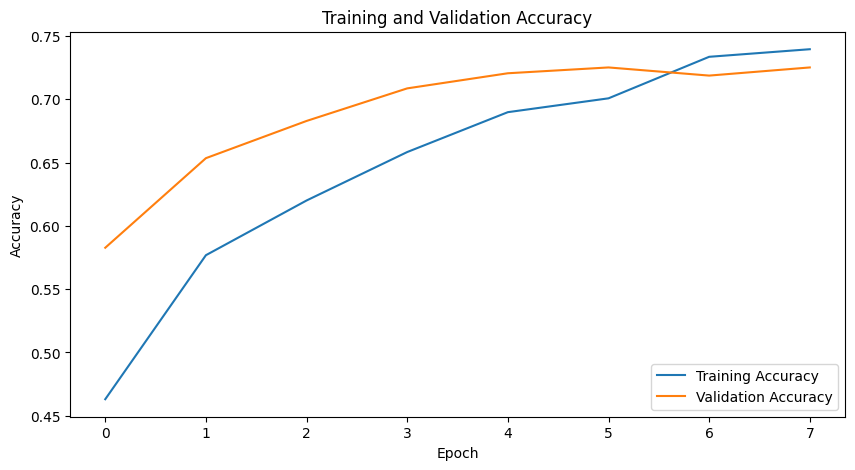

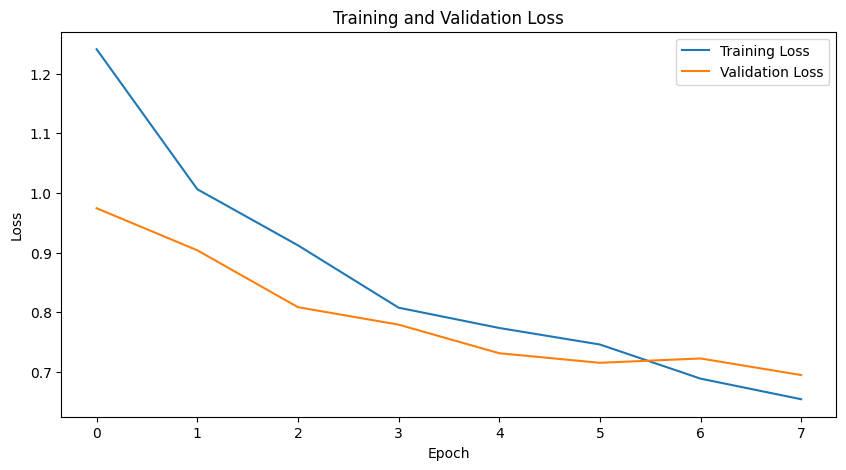

In [190]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# PERFORMANCE EVALUATION

In [191]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 [==============================] - 3s 3s/step


In [192]:
conf_mat = confusion_matrix(correct_labels, predicted_labels)

In [193]:
report = classification_report(correct_labels,predicted_labels,  output_dict=True)
df = pd.DataFrame(report).transpose()

In [194]:
display(HTML(df.to_html()))

,precision,recall,f1-score,support
0,0.813953,0.846774,0.830040,124.000000
1,0.856436,0.865000,0.860697,200.000000
2,0.782895,0.843972,0.812287,141.000000
3,0.868852,0.670886,0.757143,79.000000
accuracy,0.827206,0.827206,0.827206,0.827206
macro avg,0.830534,0.806658,0.815041,544.000000
weighted avg,0.829494,0.827206,0.826123,544.000000


In [195]:
confm = pd.DataFrame(conf_mat)
confm

,0,1,2,3
0,105,2,16,1
1,5,173,16,6
2,13,8,119,1
3,6,19,1,53


# SAVING THE MODEL

> Save the model

In [219]:
from tensorflow.keras.models import load_model

In [220]:
model.save(os.path.join('models','tomjerryclassifier.h5'))

c:\ProgramData\anaconda3\envs\CUSTOM\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [221]:
new_model = load_model(os.path.join('models','tomjerryclassifier.h5'))

In [222]:
new_model

# FINAL TESTING

> testing with image of neither

In [223]:
import cv2

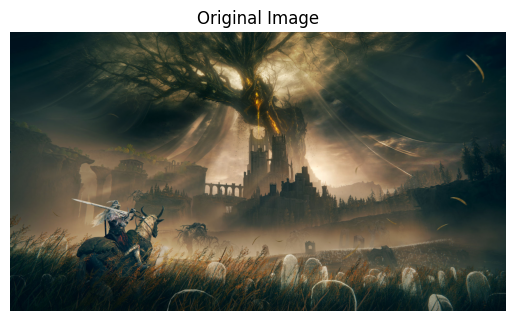

In [259]:
img_path = os.path.join('tom_and_jerry', 'unusedimagesfromonline','tom_jerry_0', 'er.jpg')
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

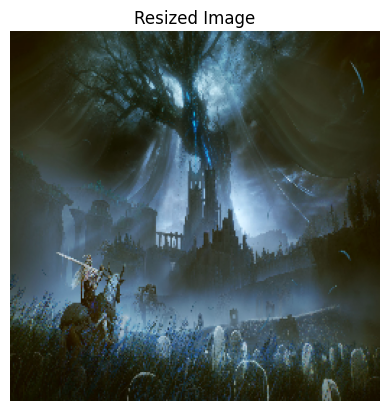

In [260]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.title('Resized Image')
plt.axis('off')
plt.show()

In [261]:
# Normalize the image
resize = resize / 255.0
input_image = np.expand_dims(resize, axis=0)

In [263]:
predictions = new_model.predict(input_image)

1/1 [==============================] - 1s 624ms/step


In [264]:
predicted_class = np.argmax(predictions, axis=-1)[0]
class_names = ['Class 0 - Jerry', 'Class 1 - Tom', 'Class 2 - Neither Tom or Jerry', 'Class 3 - Both Tom and Jerry']
predicted_class_name = class_names[predicted_class]

In [267]:
print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Class 2 - Neither Tom or Jerry


> testing with image of Tom

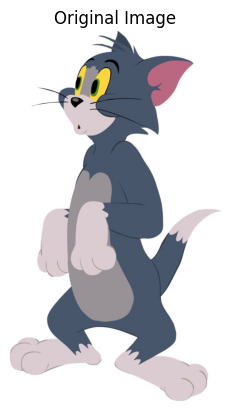

In [268]:
img_path = os.path.join('tom_and_jerry', 'unusedimagesfromonline', 'tom', 'tom.jpg')
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

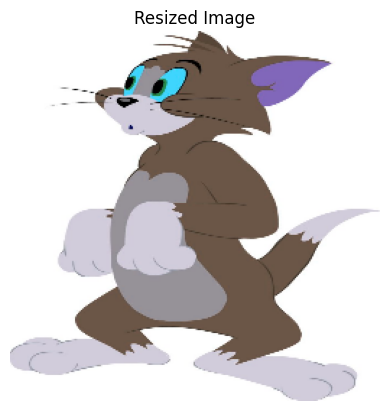

In [269]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.title('Resized Image')
plt.axis('off')
plt.show()

In [270]:
# Normalize the image
resize = resize / 255.0
input_image = np.expand_dims(resize, axis=0)

In [271]:
predictions = new_model.predict(input_image)

1/1 [==============================] - 0s 149ms/step


In [272]:
predicted_class = np.argmax(predictions, axis=-1)[0]
class_names = ['Class 0 - Jerry', 'Class 1 - Tom', 'Class 2 - Neither Tom or Jerry', 'Class 3 - Both Tom and Jerry']
predicted_class_name = class_names[predicted_class]

In [273]:
print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Class 1 - Tom


> predicting Jerry

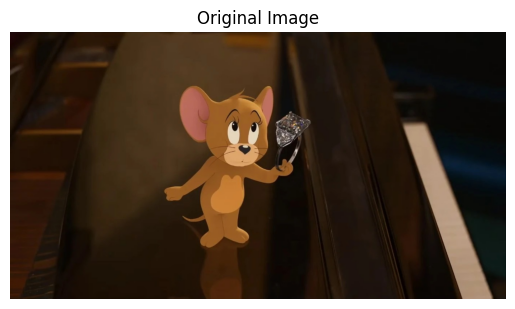

In [292]:
img_path = os.path.join('tom_and_jerry', 'unusedimagesfromonline', 'jerry', 'jerry.jpg')
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

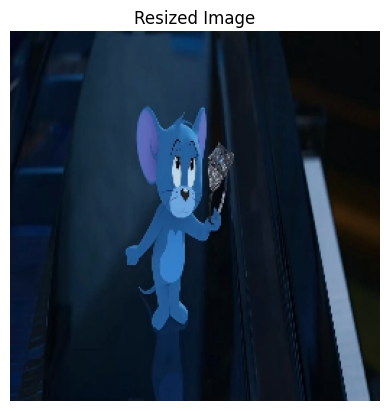

In [293]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.title('Resized Image')
plt.axis('off')
plt.show()

In [294]:
# Normalize the image
resize = resize / 255.0
input_image = np.expand_dims(resize, axis=0)

In [295]:
predictions = new_model.predict(input_image)

1/1 [==============================] - 0s 161ms/step


In [296]:
predicted_class = np.argmax(predictions, axis=-1)[0]
class_names = ['Class 0 - Jerry', 'Class 1 - Tom', 'Class 2 - Neither Tom or Jerry', 'Class 3 - Both Tom and Jerry']
predicted_class_name = class_names[predicted_class]

In [297]:
print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Class 0 - Jerry


> predicting both Tom and Jerry

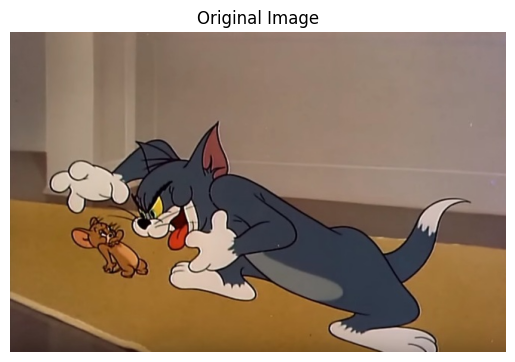

In [304]:
img_path = os.path.join('tom_and_jerry', 'unusedimagesfromonline', 'tom_jerry_1', 'both.jpg')
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

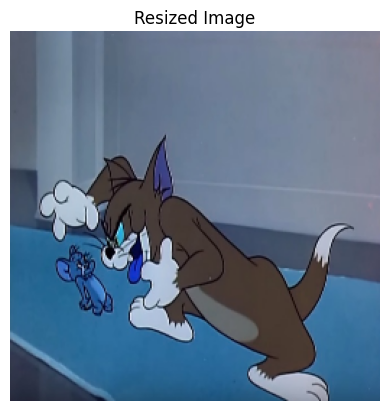

In [305]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.title('Resized Image')
plt.axis('off')
plt.show()

In [306]:
# Normalize the image
resize = resize / 255.0
input_image = np.expand_dims(resize, axis=0)

In [307]:
predictions = new_model.predict(input_image)

1/1 [==============================] - 0s 271ms/step


In [308]:
predicted_class = np.argmax(predictions, axis=-1)[0]
class_names = ['Class 0 - Jerry', 'Class 1 - Tom', 'Class 2 - Neither Tom or Jerry', 'Class 3 - Both Tom and Jerry']
predicted_class_name = class_names[predicted_class]

In [309]:
print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Class 1 - Tom
